# Python project
The purpose and goal with the analysis is to explore functions and syntax in python, 

to find information in the data and to be familiar with the fundamental basics infrastructures within python.

The report has conducted findings and insights.

starting with the essentials

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import seaborn as sns
# These are just comments so you can delete later to not spoil your report. They won't affect your code.
# Great that you are keeping import modules and libraries here.
# It looks much more professional now with the introduction. Amazing!

Read data

In [2]:
df = pd.read_csv('/Users/lucy/Documents/Vinter/merged_goldeikon.csv')

# Describe Data set 
when describing the dataset we get a summary and overview on it's context

In [3]:
df.head(5)

,datetime,close,amount,ex_symbol
0,2021-02-04,173.26,354292.0,l_sgld
1,2021-02-03,177.79,26805.0,l_sgld
2,2021-02-02,177.91,21356.0,l_sgld
3,2021-02-01,180.30,38422.0,l_sgld
4,2021-01-29,179.91,102532.0,l_sgld


In [4]:
df.describe()
# Good use of describe. If you want to see less decimals try round().

,close,amount
count,11968.000000,1.196800e+04
mean,253.108282,1.041352e+05
std,385.863657,4.346516e+05
min,21.260000,1.000000e+00
25%,119.560000,3.008250e+03
50%,126.345000,1.163700e+04
75%,155.030000,5.586175e+04
max,1959.000000,1.708597e+07


# Exchange Traded Fund
We can find information about the diffrent etf's and it's values

In [5]:
df['ex_symbol'].head() # I think this is not necessary because you can see it above on the block 3 when you use df.head()

0    l_sgld
1    l_sgld
2    l_sgld
3    l_sgld
4    l_sgld
Name: ex_symbol, dtype: object

In [6]:
df['ex_symbol'].unique() # This is key when you analyze large time series, because it gives you a nice glimpse of the financial assets you are working with.

array(['l_sgld', 's_sgld', 'l_igln', 'l_xgld', 's_xgld', 'l_gbsx',
       'l_phau', 's_csgold', 'l_sgbs', 's_zgldus'], dtype=object)

In [7]:
df['ex_symbol'].nunique() # Good, currently at Vinter we are using only these 10 ETFs to calculate our indexes.

10

In [8]:
df["ex_symbol"].describe() # Applying describe to object data types dont show much as you can see. Be very catious when you apply describe().

count      11968
unique        10
top       l_gbsx
freq        1289
Name: ex_symbol, dtype: object

In [ ]:
df["ex_symbol"].value_mean() # What do you want to get from this line of code?

In [9]:
df["ex_symbol"].value_counts() # Good stats.

l_gbsx      1289
l_phau      1289
l_igln      1289
l_xgld      1289
l_sgld      1289
l_sgbs      1280
s_csgold    1279
s_zgldus    1279
s_sgld      1005
s_xgld       680
Name: ex_symbol, dtype: int64

In [10]:
df.groupby(['ex_symbol','datetime']).mean().unstack(0)
# Awesome! You found the advatanges of groupby.
# As you can see you're getting data from two variables close and amount. However we are only interested on close.
# Try this: df.groupby(['ex_symbol','datetime'])['close'].mean().unstack(0) to get only values related to close.

close                                                          \
ex_symbol   l_gbsx l_igln  l_phau  l_sgbs  l_sgld  l_xgld s_csgold  s_sgld   
datetime                                                                     
2016-01-04  102.54  21.26  103.78  105.05  105.53  105.82   105.54  105.91   
2016-01-05  102.82  21.32  104.23  105.32  105.81  106.08   105.43  105.65   
2016-01-06  103.97  21.55  105.45  106.52  107.06  107.29   106.63  106.80   
2016-01-07  105.51  21.87  106.93  108.09  108.57  108.86   108.27  108.39   
2016-01-08  105.29  21.83  106.73  107.88  108.36  108.64   107.90  108.23   
...            ...    ...     ...     ...     ...     ...      ...     ...   
2021-01-29  173.39  36.29  175.98  179.01  179.91  180.31   179.44  179.92   
2021-02-01  173.89  36.35  176.55  179.53  180.30  180.58   180.00  180.14   
2021-02-02  171.48  35.89  174.06  177.19  177.91  178.22   177.64  177.90   
2021-02-03  171.33  35.89  173.93  176.86  177.79  178.32   177.40  177.34   
2021-02-04  166.91  34.95  169.52  172.31  173.26  173.56   172.64  173.26   

                               amount                                         \
ex_symbol   s_xgld s_zgldus    l_gbsx    l_igln   l_phau   l_sgbs     l_sgld   
datetime                                                                       
2016-01-04  105.86  1048.21   35927.0   48848.0  33808.0   1567.0    24000.0   
2016-01-05     NaN  1046.98   33608.0    9965.0  36818.0  10031.0    83773.0   
2016-01-06     NaN  1060.15   64732.0   46331.0  64272.0  18042.0  1111497.0   
2016-01-07     NaN  1076.09   98517.0   32573.0  76768.0   3894.0  1777423.0   
2016-01-08  107.46  1072.90  126175.0   11128.0  26347.0  53428.0   137534.0   
...            ...      ...       ...       ...      ...      ...        ...   
2021-01-29  179.70  1767.80   21223.0  597622.0  32265.0   9106.0   102532.0   
2021-02-01  181.18  1770.60    7814.0  489657.0  27440.0   3394.0    38422.0   
2021-02-02  177.74  1751.00   18496.0  170826.0  17446.0   7886.0    21356.0   
2021-02-03     NaN  1748.20    9872.0  257208.0  21328.0   1895.0    26805.0   
2021-02-04  173.56  1703.60   23698.0  823755.0  36196.0  20074.0   354292.0   

                                                        
ex_symbol    l_xgld s_csgold   s_sgld  s_xgld s_zgldus  
datetime                                                
2016-01-04   4897.0   4263.0   8163.0  2000.0    542.0  
2016-01-05   3206.0   1110.0   8000.0     NaN   2986.0  
2016-01-06   7774.0   6468.0  33995.0     NaN   4357.0  
2016-01-07    166.0   2941.0  11758.0     NaN  12058.0  
2016-01-08   3284.0   7154.0   6487.0   600.0   1862.0  
...             ...      ...      ...     ...      ...  
2021-01-29   4480.0  13010.0  14462.0    76.0   6620.0  
2021-02-01   7522.0  15816.0  18959.0   526.0   2723.0  
2021-02-02   3892.0   3675.0  12561.0   190.0   1688.0  
2021-02-03   2274.0   2783.0  11332.0     NaN   1421.0  
2021-02-04  13199.0   2963.0  18542.0  4200.0   4301.0  

[1305 rows x 20 columns]

# matplotlib
with these timeserie analyses we get an overview on the amount and close during the time interval. 

In [11]:
df['datetime'] = pd.to_datetime(df['datetime']) # Now you're getting more aware of time series analysis. Important to have the datetime column in the right format.

<AxesSubplot:xlabel='datetime'>

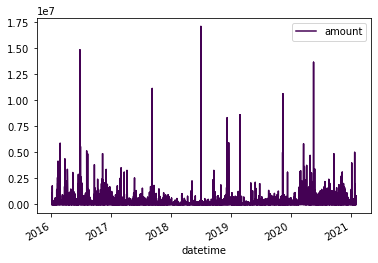

In [12]:
df.plot.line(x='datetime', y='amount', colormap='viridis', grid=False) # colormap usually helps more when you have more series,
                                                                       # try plotting different series in one plot.
# You can do that by just using newdf.plot(colormap='viridis', grid=True)
# Where newdf is your groupby dataframe only with amount or close values.

<AxesSubplot:xlabel='datetime'>

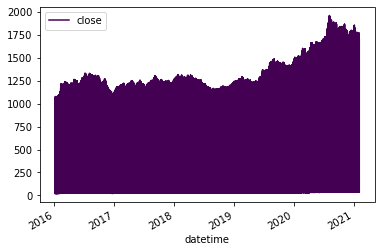

In [13]:
df.plot.line(x='datetime', y='close', colormap='viridis', grid=False) # Here you're plotting all close prices for the entire group.
# We need to see it for each ETF, please modify this.

# 
normal distribution

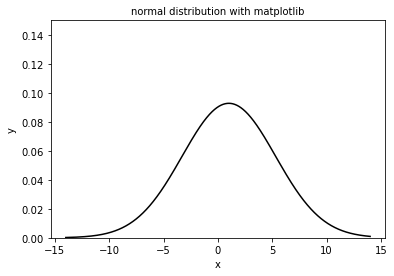

In [29]:
x_min = 1.0 # Dont hard code, get this values from your dataframes above. Fix this.
x_max = 1.7

mean = 1.0
std = 4.3

x = np.arange(-14, 14, 0.0014)

y = scipy.stats.norm.pdf(x,mean,std)

plt.ylim(0,0.15) # This is not shown on your chart. Where is it?

plt.title('normal distribution with matplotlib',fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("normal.png")
plt.plot(x,y, color='black')

<AxesSubplot:ylabel='Frequency'>

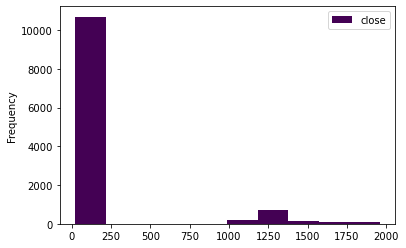

In [30]:
df.plot.hist(x='datetime', y='close', colormap='viridis', grid=False) # Use your groupby dataframe to do the charts.
# Fix this becasue it's not showing relevant data.

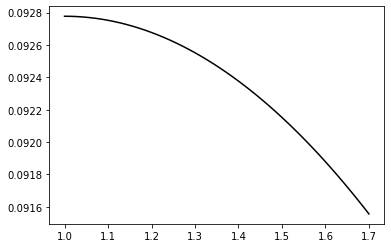

In [31]:
x_min = 1.0 # Fix the hard code. Dont use constant values.
x_max = 1.7

mean = 1.0 
std = 4.3

x = np.linspace(x_min, x_max)

y = scipy.stats.norm.pdf(x,mean,std)


plt.plot(x,y, color='black') # What's this function for? I dont understand it, try to add more text above about what it is and the purpose.